ДЗ-9. На сайте https://rdstroy.ru/price/ приведён обновляющийся прайс-лист из ~40000 товаров компании, торгующей строительными материалами. Требуется а) построить график Boxplot для стоимости одной единицы товара по каждой категории второго уровня (напр., "Тепловое оборудование"), на котором можно будет увидеть, как соотносятся разные категории по цене товаров в них.

In [3]:
import requests

url = 'https://rdstroy.ru/upload/pricelist.xlsx'

r = requests.get(url)

import os
import tempfile
import openpyxl
import random
import re


with tempfile.TemporaryDirectory() as d:
    path = os.path.join(d + 'price.xlsx')
    with open(path, 'wb') as f:
        f.write(r.content)
        
    wb = openpyxl.load_workbook(path)
    
sheet = wb.active

category = None
sheet = wb.active
data = []
category2_re = re.compile(r'  \S')
data_re = re.compile(r'[Сс]-|00')
for i in sheet.iter_rows(min_row=3, min_col=1, max_col=4):

    if category2_re.match(i[0].value):
        category = i[0].value[2:]

    if data_re.match(i[0].value):
        data.append({'category': category, 'id': i[0].value, 'price': float(i[3].value)})
        
len(data)

34807

In [3]:
import pandas

df = pandas.DataFrame(data)

df

,category,id,price
0,Битумные материалы,С-000180635,76.49
1,Битумные материалы,С-000090842,94.37
2,Битумные материалы,С-000055492,141.97
3,Битумные материалы,С-000119729,155.85
4,Битумные материалы,С-000119731,179.58
...,...,...,...
34995,Садово-хозяйственная группа,С-000199255,148.20
34996,Садово-хозяйственная группа,С-000199101,1188.60
34997,Садово-хозяйственная группа,С-000199411,280.00
34998,Садово-хозяйственная группа,С-000199412,948.60


In [ ]:
# Сохраняем прайс-лист первого дня в файл

df.to_csv('C:/Users/vera.kosareva/day1.csv', encoding='utf-8')

In [ ]:
# Через сутки запускаем снова и сохраняем в файл

#import time

#time.sleep(3600*24*7)

#df.to_csv('C:/Users/vera.kosareva/day2.csv', encoding='utf-8')

In [17]:
# Рассчитаем среднюю цену для каждой категории и отсортируем категории по ней

import pandasql

df2 = pandasql.sqldf("""
SELECT category, avg(price) as avg_price 
FROM df
GROUP BY category
ORDER BY avg_price asc
""", locals())

df2

,category,avg_price
0,Крепеж кровельных материалов,15.264286
1,Электромонтажный крепеж,19.758193
2,Сантехнический крепеж,29.158022
3,Крепеж и комплектующие для монолитного домостр...,37.376667
4,Вентилируемые фасады,49.057411
...,...,...
77,"Двери, окна",18850.879167
78,Электроинструмент,19004.348879
79,Электро-бензооборудование,23912.469103
80,Строительное оборудование,28458.727704


In [18]:
# Объединим все данные в один датафрейм

df_3 = df2.merge(df, how = 'outer', left_on = 'category', right_on = 'category')

df_3

,category,avg_price,id,price
0,Крепеж кровельных материалов,15.264286,С-000222832,3.2
1,Крепеж кровельных материалов,15.264286,С-000222945,3.7
2,Крепеж кровельных материалов,15.264286,С-000222833,4.2
3,Крепеж кровельных материалов,15.264286,С-000222831,4.2
4,Крепеж кровельных материалов,15.264286,С-000222946,5.0
...,...,...,...,...
34995,Котлы отопления,41160.706667,С-000199107,62100.0
34996,Котлы отопления,41160.706667,С-000195157,53000.0
34997,Котлы отопления,41160.706667,С-000199957,44900.0
34998,Котлы отопления,41160.706667,С-000199968,44900.0


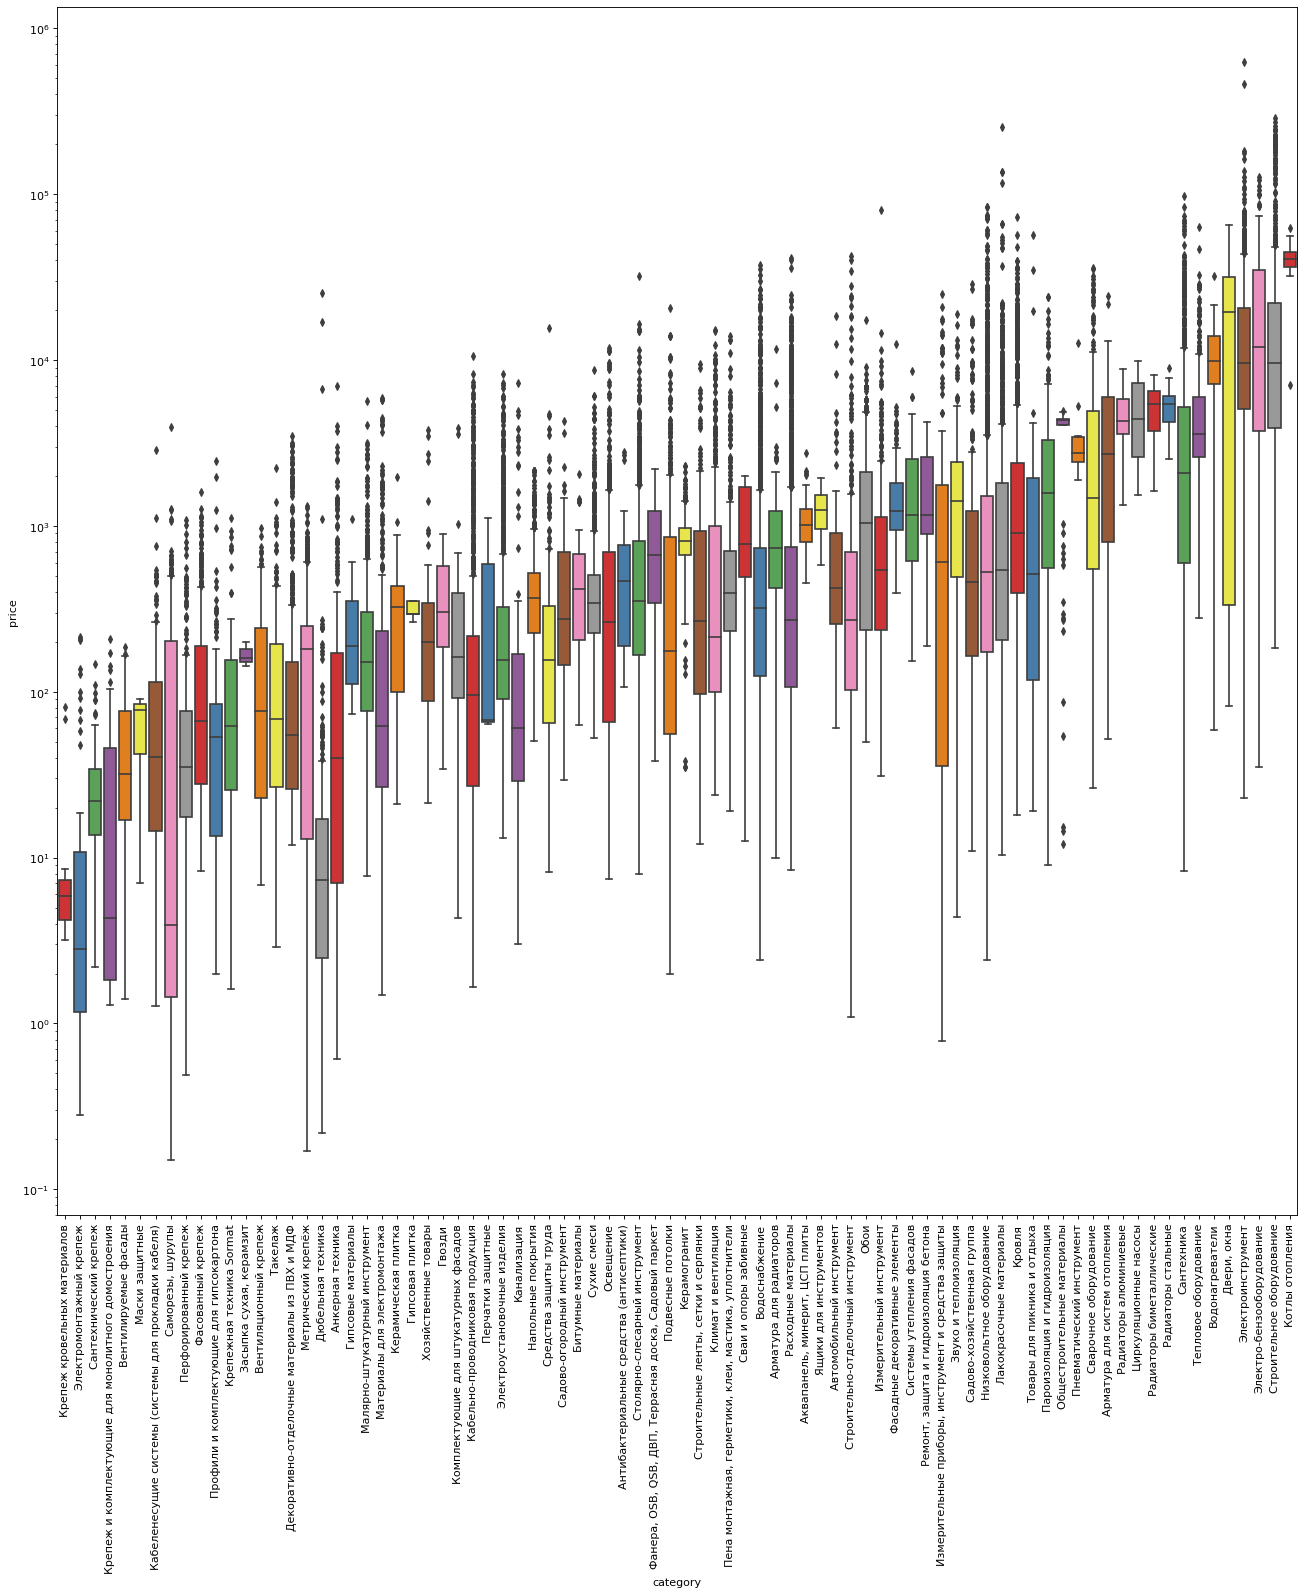

In [19]:
# Отобразим данные на графике boxplot

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,20), facecolor='white', dpi= 80)
fig = sns.boxplot(x='category', y='price', data=df_3, palette='Set1')
ax.set_yscale('log')

plt.xticks(rotation=90)

plt.show()

Задание Б. Для двух прайс-листов соседних суток вывести все товары, которые упали в цене минимум на 5%.

In [13]:
df3 = pandas.read_csv('C:/Users/vera.kosareva/day1.csv', encoding='utf-8')
df4 = pandas.read_csv('C:/Users/vera.kosareva/day2.csv', encoding='utf-8')

df5 = pandasql.sqldf("""
SELECT df3.id, df3.price, df4.price as new_price
FROM df3
JOIN df4 ON df3.id = df4.id
WHERE ((df3.price-new_price)/df3.price)*100 >= 5
""", locals())

df5

,id,price,new_price
0,С-000261722,116.75,109.66
1,С-000261724,119.51,112.66
2,С-000012630,351.88,331.00
3,С-000261800,288.94,269.00
4,С-000013023,411.00,382.00
5,С-000039776,306.77,252.80
6,С-000174944,504.20,427.30
7,С-000161577,504.20,427.30
8,С-000265657,360.00,328.10
9,С-000265663,360.00,328.10
